In [1]:
import Axelrod_Sim as axel
import Strategy as st
import numpy as np
from numpy import random
import matplotlib.pyplot as plt
from matplotlib import cm

In [2]:
Payoff_Matrix = np.array([                      
    [3, 0, -4],
    [5, 1, -4],
    [0, 0, -2],
])

Generations = 500
Months = 12

In [3]:
def Generate_H2h_Matrix(Time, Payoff_Matrix):
    #Generates a matrix of head to head values between strategies
    Strats = st.Get_All_Strats()
    H2H_Matrix = []
    Player_Results = []
    X = 0
    for Result in axel.Full_Game(Time, Payoff_Matrix)[1]: 
        Player_Results.append(Result[0])
        X += 1
        if X == len(Strats):
            H2H_Matrix.append(Player_Results)
            X = 0
            Player_Results = []
    return(np.array(H2H_Matrix))



In [4]:
def Get_Fitness(Payoff_Matrix, population):
    Fitness_Vec = []
    for x in range(len(Payoff_Matrix[0])):
        Fitness = 0
        for y in range(len(Payoff_Matrix[0])):
            if y == x:
                Fitness += (population[y]-1)*(Payoff_Matrix[x])[y]
            else:
                Fitness += population[y]*(Payoff_Matrix[x])[y]
        Fitness = Fitness/(np.sum(population)-1)
        Fitness_Vec.append(np.exp(2 * Fitness))
    return(np.array(Fitness_Vec))

In [5]:
def Run_Sim(Time, Payoff_Matrix, Generations):
    #runs the moran process simulation
    H2H_Matrix = Generate_H2h_Matrix(Time, Payoff_Matrix)
    Population = []
    Selection_Values_Duplication = np.zeros(len(H2H_Matrix[0]))
    Selection_Values_Removal = np.zeros(len(H2H_Matrix[0]))
    for x in range(len(H2H_Matrix[1])):
        Population.append(2)
    Population = np.array(Population)
    Population_Over_Time = [0 for b in range(Generations)]
    for x in range(Generations):
        Fitness = Get_Fitness(H2H_Matrix, Population)
        for i in range(len(H2H_Matrix[0])):
            Selection_Values_Duplication[i] = ((Population[i]) * Fitness[i])/((np.sum(Population * Fitness)))
        for k in range(len(H2H_Matrix[0])):
            Selection_Values_Removal[k] = (Population[k])/np.sum(Population)
        Moran_Selection_Duplication = random.choice([b for b in range(len(Population))], p=Selection_Values_Duplication, size=(1))[0]
        Moran_Selection_Removal = random.choice([l for l in range(len(Population))], p=Selection_Values_Removal, size=(1))[0]
        Population[int(Moran_Selection_Duplication)] = Population[int(Moran_Selection_Duplication)] + 1
        Population[int(Moran_Selection_Removal)] = Population[int(Moran_Selection_Removal)] - 1
        Population_Over_Time[x] = Population.tolist()
    return(Population_Over_Time)
    

In [6]:
def Display_Results(Data, Generations):
    Names = st.Get_All_Names()
    colour = iter(cm.rainbow(np.linspace(0, 1, len(Data[0]))))
    x = [i for i in range(Generations)]
    for k in range(len(Data[0])):
        c = next(colour)
        y = [(Data[i])[k] for i in range(Generations)]
        plt.plot(x, y, color = c, label = Names[k])
    plt.xlabel("Generations")
    plt.ylabel("Population")

    plt.legend(bbox_to_anchor=(1.1, 1.05))

    plt.show

In [7]:
def Get_Average_Result(Months, Payoff_Matrix, Generations):
    #Gets an average result from the 
    Results = []
    Average_Pop_Over_Time = []
    for x in range(1000):
        Results.append(Run_Sim(Months, Payoff_Matrix, Generations))
    for Agreement in range(Generations):
        temp_Generation = []
        for Strategy in range(len(Results[0][0])):
            s = 0
            for Sim in Results:
                s += Sim[Agreement][Strategy]
            temp_Generation.append(s/len(Results))
        Average_Pop_Over_Time.append(temp_Generation)
    Names = st.Get_All_Names()
    colour = iter(cm.rainbow(np.linspace(0, 1, len(Names))))
    x = [i for i in range(Generations)]
    for k in range(len(Average_Pop_Over_Time[0])):
        c = next(colour)
        y = [Average_Pop_Over_Time[i][k] for i in range(Generations)]
        plt.plot(x, y, color = c, label = Names[k])
    plt.xlabel("Generations")
    plt.ylabel("Population")

    plt.legend(bbox_to_anchor=(1.1, 1.05))

    plt.show
    

            


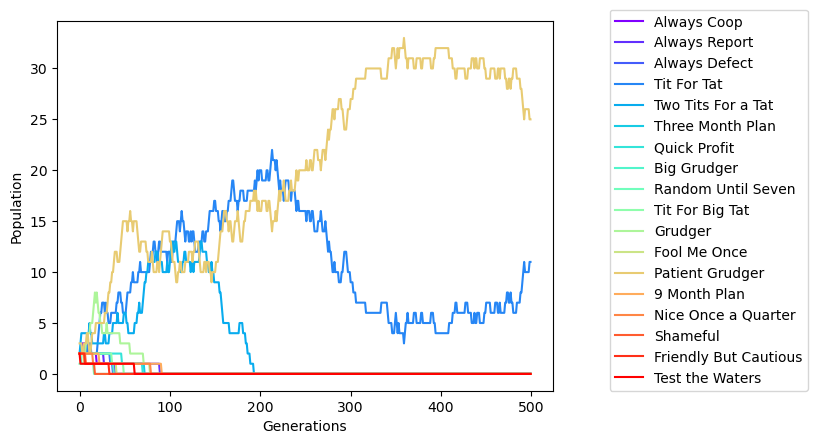

In [ ]:
Moran_Sim_Result = Run_Sim(Months, Payoff_Matrix, Generations)
Display_Results(Moran_Sim_Result, Generations)
#This runs once, but due to stochasticity it often produces a different result each time.

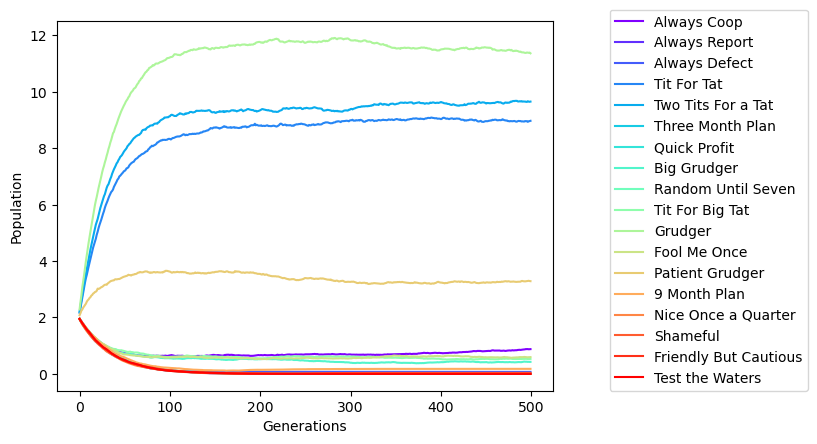

In [11]:
Get_Average_Result(Months, Payoff_Matrix, Generations)


In [8]:
axel.Show_Player_Scores(Months, Payoff_Matrix)

Grudger 740
Tit For Tat 730
Two Tits For a Tat 730
Patient Grudger 708
9 Month Plan 675
Big Grudger 657
Always Coop 651
Tit For Big Tat 646
Fool Me Once 633
Always Defect 624
Nice Once a Quarter 566
Shameful 526
Test the Waters 525
Random Until Seven 399
Three Month Plan 182
Friendly But Cautious 176
Quick Profit 126
Always Report -4
[[36, 36, 'Always Coop', 'Always Coop'], [-4, 0, 'Always Coop', 'Always Report'], [0, 60, 'Always Coop', 'Always Defect'], [36, 36, 'Always Coop', 'Tit For Tat'], [36, 36, 'Always Coop', 'Two Tits For a Tat'], [-1, 8, 'Always Coop', 'Three Month Plan'], [-4, 5, 'Always Coop', 'Quick Profit'], [36, 36, 'Always Coop', 'Big Grudger'], [2, 31, 'Always Coop', 'Random Until Seven'], [36, 36, 'Always Coop', 'Tit For Big Tat'], [36, 36, 'Always Coop', 'Grudger'], [36, 36, 'Always Coop', 'Fool Me Once'], [36, 36, 'Always Coop', 'Patient Grudger'], [23, 37, 'Always Coop', '9 Month Plan'], [12, 52, 'Always Coop', 'Nice Once a Quarter'], [0, 60, 'Always Coop', 'Shamef